# Week 04. Machine Learning with Text Data

Natural Language Processing for Law and Social Science<br>
Elliott Ash, ETH Zurich

In [ ]:
# set random seed
import numpy as np
np.random.seed(4)

In [ ]:
# If you are using Google Colab, here's the code to load sc_cases_cleaned.pkl from local. 
from google.colab import files
uploaded = files.upload()

Saving sc_cases_cleaned.pkl to sc_cases_cleaned.pkl


In [ ]:
# set up
import warnings; warnings.simplefilter('ignore')
%matplotlib notebook
import pandas as pd
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957


In [ ]:
df = df.assign(authorship_id=(df['authorship']).astype('category').cat.codes)
df['authorship'].value_counts() 

SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: authorship, dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'log_cite_count'}>]], dtype=object)

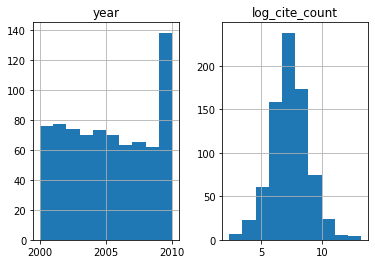

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df[['year','log_cite_count']].hist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=4,
                        stop_words='english',
                        ngram_range=(1,3))
X = vectorizer.fit_transform(df['opinion_text'])
words = vectorizer.get_feature_names_out()
print(words)
X

['act' 'congress' 'district' 'state']


<768x4 sparse matrix of type '<class 'numpy.int64'>'
	with 2534 stored elements in Compressed Sparse Row format>

In [ ]:
# X = X.todense()
X = X / X.sum(axis=1) # counts to frequencies
for i, word in enumerate(words):
    column = X[:,i]
    df['x_'+word] = column
df

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count,authorship_id,x_act,x_congress,x_district,x_state
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392,2,0.193548,0.225806,0.161290,0.419355
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174,9,0.261905,0.095238,0.047619,0.595238
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952,4,0.012821,0.025641,0.461538,0.500000
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817,3,0.322581,0.129032,0.000000,0.548387
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957,3,0.019231,0.000000,0.596154,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,"MICHAEL F. EASLEY, * GOVERNOR OF NORTH CAROLIN...",majority,2001-04-18,BREYER,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', ""O'CONNO...","['KENNEDY, ANTHONY', 'REHNQUIST, WILLIAM', 'SC...",2.0,1236.0,JUSTICE BREYER delivered the opinion of the Co...,2001,7.119636,1,0.000000,0.000000,0.928994,0.071006
764,"GAIL ATWATER, et al. v. CITY OF LAGO VISTA et al.",majority,2001-04-24,SOUTER,1.0,"['KENNEDY, ANTHONY', 'REHNQUIST, WILLIAM', 'SC...","['BREYER, STEPHEN', 'GINSBURG, RUTH', ""O'CONNO...",1.0,3120.0,JUSTICE SOUTER delivered the opinion of the Co...,2001,8.045588,8,0.292308,0.046154,0.092308,0.569231
765,"JAMES ALEXANDER, DIRECTOR, ALABAMA DEPARTMENT ...",majority,2001-04-24,SCALIA,1.0,"['KENNEDY, ANTHONY', ""O'CONNOR, SANDRA"", 'REHN...","['BREYER, STEPHEN', 'GINSBURG, RUTH', 'SOUTER,...",9.0,4986.0,JUSTICE SCALIA delivered the opinion of the Co...,2001,8.514389,7,0.279070,0.465116,0.093023,0.162791
766,UNITED STATES v. OAKLAND CANNABIS BUYERS' COOP...,majority,2001-05-14,THOMAS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,736.0,JUSTICE THOMAS delivered the opinion of the Co...,2001,6.601230,10,0.312500,0.260417,0.427083,0.000000


In [ ]:
# inspecting data
import numpy as np
features = ['x_'+x for x in words]
cites_features = ['log_cite_count'] + features
df2 = df[cites_features]
corr_matrix = df2.corr()
corr_matrix['log_cite_count'].sort_values(ascending=False)

log_cite_count    1.000000
x_state           0.153254
x_district        0.111862
x_congress       -0.137626
x_act            -0.237354
Name: log_cite_count, dtype: float64

array([[<AxesSubplot:xlabel='log_cite_count', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_act', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_congress', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_district', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_state', ylabel='log_cite_count'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_act', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_congress', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_district', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_state', ylabel='x_act'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_act', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_congress', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_district', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_state', ylabel='x_congress'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='

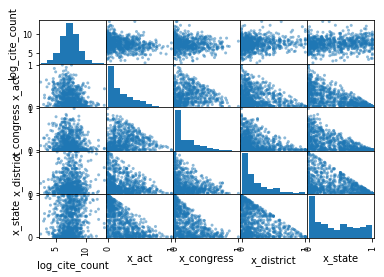

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2)

<AxesSubplot:xlabel='x_act', ylabel='log_cite_count'>

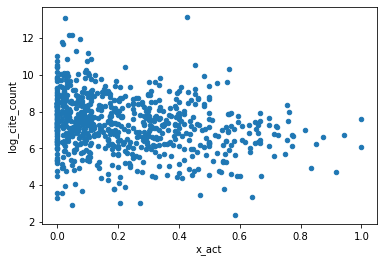

In [ ]:
df2.plot(kind='scatter', x='x_act', y='log_cite_count')

# Regression

In [ ]:
# create a test set 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)

In [ ]:
Xtrain = train[features]
Ytrain = train['log_cite_count']
Xtrain.head()

,x_act,x_congress,x_district,x_state
596,0.173913,0.369565,0.152174,0.304348
90,0.022388,0.000000,0.149254,0.828358
734,0.774194,0.096774,0.096774,0.032258
694,0.282051,0.256410,0.128205,0.333333
517,0.016949,0.000000,0.000000,0.983051


In [ ]:
Ytrain.head()

596    8.449771
90     8.477620
734    6.648985
694    5.236442
517    3.583519
Name: log_cite_count, dtype: float64

In [ ]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(Xtrain, Ytrain)
lin_reg.coef_ 

array([-1.05443811, -0.27079188,  0.87434979,  0.45088019])

In [ ]:
# in-sample performance
from sklearn.metrics import mean_squared_error
Ytrain_pred = lin_reg.predict(Xtrain)        
train_mse = mean_squared_error(Ytrain,Ytrain_pred)
train_mse

2.1599649495666817

In [ ]:
# out-of-sample performance
Xtest = test[features]
Ytest = test['log_cite_count']
Ytest_pred = lin_reg.predict(Xtest)        
test_mse = mean_squared_error(Ytest,Ytest_pred)
test_mse

2.1030016631048745

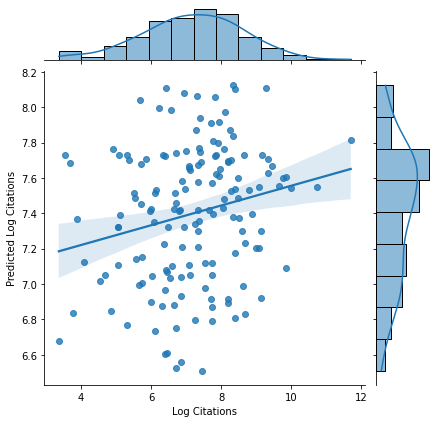

In [ ]:
import seaborn as sns

p = sns.jointplot(x=Ytest, y=Ytest_pred, kind='reg')
p.set_axis_labels('Log Citations', 'Predicted Log Citations', fontsize=10)


# Pipelines and Cross-Validation

In [ ]:
# missing values
df['authorship_id'].fillna(0,inplace=True)

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df2)
df2 = pd.DataFrame(X,columns=df2.columns)

In [ ]:
X

array([[ 0.4273395 , -0.10042156,  0.26583686, -0.25620003,  0.08875597],
       [-1.69574977,  0.2303693 , -0.38976878, -0.73332927,  0.62993863],
       [ 1.7975002 , -0.97500173, -0.73922735,  1.00407587,  0.33689649],
       ...,
       [ 0.778854  ,  0.31343437,  1.46745168, -0.54274748, -0.70067715],
       [-0.48288351,  0.47521029,  0.43962056,  0.85945227, -1.20157476],
       [ 0.20858247,  0.53243068, -0.86797524, -0.93320774,  0.87744045]])

In [ ]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
judge = df['authorship_id']
print(judge.values.shape)
print(judge.values.reshape(-1,1).shape)
judge_fes = encoder.fit_transform(judge.values.reshape(-1,1))
judge_ids = ['j_'+str(x) for x in range(len(judge.unique()))]
judge_fes = pd.DataFrame(judge_fes.todense(),columns=judge_ids)
df = pd.concat([df,judge_fes],axis=1)
train, test = train_test_split(df, test_size=0.2)

(768,)
(768, 1)


In [ ]:
# Cross-validation
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,
                         df[features],
                         df['x_republican'],
                         cv=3,
                         n_jobs=-1)

# the default score for random forest reg is negative MSE.
print(np.abs(scores.mean()),scores.std())

0.08779109432773417 0.022789022811549944


In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=3)              
grid_search.fit(df[features],df['x_republican'])

print(grid_search.best_params_)
print(np.abs(grid_search.best_score_))

{'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.09341235411244335


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=3)              
rand_search.fit(df[features],df['x_republican'])

print(rand_search.best_params_)
print(np.abs(rand_search.best_score_))

{'n_estimators': 30, 'max_features': 2, 'bootstrap': True}
0.08245484631700421


In [ ]:
# Saving and loading
import joblib
joblib.dump(forest_reg,'forest_reg.pkl') # will overwrite local files
forest_reg = joblib.load('forest_reg.pkl')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('forest_reg', RandomForestRegressor()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (2, 4, 8, 16),
    'forest_reg__n_estimators': [3, 10, 30],
    'forest_reg__max_features': [2, 4],
    'forest_reg__bootstrap': [True, False]}

In [ ]:
from pprint import pprint
from time import time

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(df.opinion_text, df.log_cite_count)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'forest_reg']
parameters:
{'forest_reg__bootstrap': [True, False],
 'forest_reg__max_features': [2, 4],
 'forest_reg__n_estimators': [3, 10, 30],
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (2, 4, 8, 16)}
Fitting 5 folds for each of 144 candidates, totalling 720 fits
done in 2514.982s

Best score: 0.176
Best parameters set:
	forest_reg__bootstrap: True
	forest_reg__max_features: 2
	forest_reg__n_estimators: 30
	vect__max_df: 0.75
	vect__max_features: 16


## Nested Cross-Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
n = 30

forest_reg = RandomForestRegressor()
non_nested_scores = np.zeros(n)
nested_scores = np.zeros(n)


param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

for i in range(n):

    # Choose cross-validation techniques for the inner and outer loops,

    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=inner_cv)
    grid_search.fit(Xtrain, Ytrain)
    non_nested_scores[i] = grid_search.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(grid_search, X=Xtrain, y=Ytrain, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))


Average difference of 0.014238 with std. dev. of 0.021509.


# Regularization

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression

m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1)
y = y.ravel()

from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2) # also adds interactions
X_poly_2 = poly_2.fit_transform(x)


poly_300 = PolynomialFeatures(degree=300) 
X_poly_300 = poly_300.fit_transform(x)


lin_reg = LinearRegression()
cross_val_score(lin_reg, x, y, cv=3, n_jobs=3).mean()

0.4100209587834282

In [ ]:
cross_val_score(lin_reg, X_poly_2, y, cv=3, n_jobs=3).mean()

0.8765265541770128

In [ ]:
cross_val_score(lin_reg, X_poly_300, y, cv=3, n_jobs=3).mean()

-2212507309162538.0

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
cross_val_score(lasso_reg,x,y).mean()

0.3529145517634959

In [ ]:
# Ridge
from sklearn.linear_model import Ridge, SGDRegressor
ridge_reg = Ridge(alpha=1)
cross_val_score(ridge_reg,x,y).mean()

0.3496477086077504

In [ ]:
###
# Elastic Net
###
from sklearn.linear_model import ElasticNetCV
enet_reg = ElasticNetCV(alphas=[.0001, .001, .01,.1,1], 
                        l1_ratio=[.0001, .001, .01,.1,.5,.9, .99, 1])
enet_reg.fit(x,y)
enet_reg.alpha_, enet_reg.l1_ratio_

(0.1, 0.0001)

In [ ]:
cross_val_score(enet_reg,x,y).mean()

0.3555344339965723

In [ ]:
scaler = StandardScaler()
Xscale = scaler.fit_transform(X)
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(alpha=.1, l1_ratio=.0001)
enet_reg.fit(Xscale,df['x_republican'])
nonzero = enet_reg.coef_ != 0
print(nonzero.sum(),'non-zero of',len(enet_reg.coef_),'coefficients.')
X_enet = X[:,nonzero]
X_enet
cross_val_score(enet_reg,X_enet,df['x_republican'],n_jobs=-1).mean()

5 non-zero of 5 coefficients.


0.009194244568332843

# Classification

In [ ]:
# Make a small data set
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer500 = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=500,
                        stop_words='english',
                        ngram_range=(1,3))
X500 = vectorizer500.fit_transform(df['opinion_text']).todense()
X500 = X500 / X500.sum(axis=1) # counts to frequencies
vocab = vectorizer500.get_feature_names_out()
for i, word in enumerate(vocab):
    column = X500[:,i]
    df['x_'+word] = column


features = [x for x in df.columns if x.startswith('x_') and x!="x_republican"]
keepcols = ['x_republican'] + features
df1 = df[keepcols]
y = df1['x_republican']
# set up train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
features = [x for x in df1.columns if x.startswith('x_') and x!="x_republican"]
df1.head()

,x_republican,x_000,x_10,x_100,x_101,x_102,x_103,x_104,x_104 ct,x_105,...,x_violated,x_violation,x_water,x_way,x_west,x_words,x_work,x_year,x_years,x_york
0,0.0,0.000000,0.000000,0.000000,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,...,0.000000,0.003419,0.000000,0.001709,0.000000,0.011966,0.000000,0.017094,0.000000,0.0
1,1.0,0.000000,0.002639,0.000000,0.002639,0.000000,0.000000,0.005277,0.002639,0.000000,...,0.002639,0.000000,0.000000,0.000000,0.005277,0.002639,0.000000,0.000000,0.000000,0.0
2,1.0,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001634,0.000000,0.001634,0.000000,0.000000,0.000000,0.013072,0.001634,0.0
3,1.0,0.000000,0.003652,0.001461,0.000000,0.000000,0.000730,0.000000,0.000000,0.006574,...,0.000000,0.000000,0.013879,0.002922,0.000000,0.000000,0.000000,0.000730,0.002922,0.0
4,1.0,0.001003,0.002006,0.001003,0.000000,0.000000,0.004012,0.000000,0.000000,0.001003,...,0.002006,0.002006,0.000000,0.000000,0.000000,0.000000,0.001003,0.003009,0.001003,0.0


In [ ]:
# Binary Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10) 
sgd_clf.fit(train[features], train['x_republican'])
sgd_clf.score(test[features],test['x_republican']) # accuracy on held-out data

0.8051948051948052

In [ ]:
# compare to picking largest category
df1['x_republican'].mean()

0.7734375

In [ ]:
from multiprocessing import cpu_count
nthreads = cpu_count() - 1

# Form cross-validated prdictions for all data points
from sklearn.model_selection import cross_val_predict
df1['x_republican_sgd'] = cross_val_predict(sgd_clf,
                                         df1[features],
                                         df1['x_republican'],
                                         cv=3,
                                         n_jobs=nthreads)

After applying a classifier to a data set with known labels `0` and `1`:

<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
<ul>

<li><strong>TP (true positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>1</code>. <br/><br/>


<li><strong>TN (true negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FP (false positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FN (false negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>1</code>.<br/><br/>

</ul>

To memorize this: 

<ul>

<li>The second word "positives"/"negatives" refers to the prediction computed by the classifier.
<li>The first word "true"/"false" expresses if the classification was correct or not.

</ul>

This is the so called <strong>Confusion Matrix</strong>:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
        </tr>
    </tbody>
</table>

</div>



- So the total number of predictions can be expressed as `TP` + `FP` + `FN` + `TN`.


- The number of correct predictions is `TP` + `TN`.


- `TP` + `FN` is the number of positive examples in our data set, 


- `FP` + `TN` is the number of negative examples.

- **precision** is computed as <code>TP / (TP + FP)</code>.


- **recall** is computed as <code>TP / (TP + FN)</code>.

- The **F1 score** is computed as <code>F1 = 2 * (precision * recall) / (precision + recall)</code>.


<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

This allows us to define <strong>accuracy</strong> as (<code>TP</code> + <code>TN</code>) / (<code>TP</code> + <code>FP</code> + <code>FN</code> + <code>TN</code>).

</div>

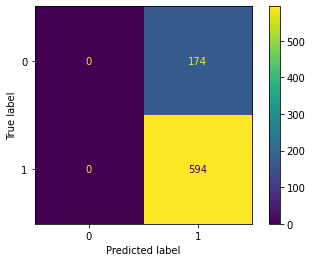

In [ ]:
# Construct confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df1['x_republican'], df1['x_republican_sgd'])
display = ConfusionMatrixDisplay(cm)
display.plot()

In [ ]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(df1['x_republican'], df1['x_republican_sgd']))
print('Recall:',recall_score(df1['x_republican'], df1['x_republican_sgd']))

Precision: 0.7734375
Recall: 1.0


In [ ]:
#F1 score
from sklearn.metrics import f1_score
f1_score(df1['x_republican'],df1['x_republican_sgd'])

0.8722466960352423

### Precision/Recall Trade Off

(array([  4.,  37., 136., 266., 223.,  76.,  19.,   5.,   1.,   1.]),
 array([0.33243687, 0.53551084, 0.73858481, 0.94165877, 1.14473274,
        1.34780671, 1.55088067, 1.75395464, 1.95702861, 2.16010257,
        2.36317654]),
 <BarContainer object of 10 artists>)

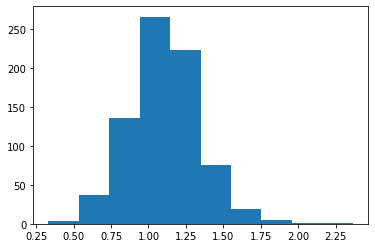

In [ ]:
# scores used by SGDClassifier
import matplotlib.pyplot as plt

y_scores = sgd_clf.decision_function(df[features])
plt.hist(y_scores) # histogram of scores

In [ ]:
# prediction using default threshold ... 
threshold = 0
(y_scores > threshold).mean()

1.0

In [ ]:
# ... gives default model prediction
ypred = sgd_clf.predict(df[features])
ypred.mean()

1.0

In [ ]:
# increasing threshold means more zeros are predicted
threshold = 1
(y_scores > threshold).mean()

0.6783854166666666

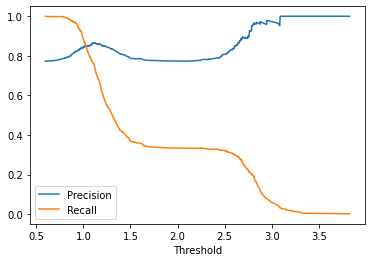

In [ ]:
# Visualizing the precision/recall tradeoff
y_scores = cross_val_predict(sgd_clf,
                             df1[features],
                             df1['x_republican'],
                             cv=3,
                             method='decision_function',
                             n_jobs=3)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(df1['x_republican'], y_scores)

import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Text(0, 0.5, 'Precision')

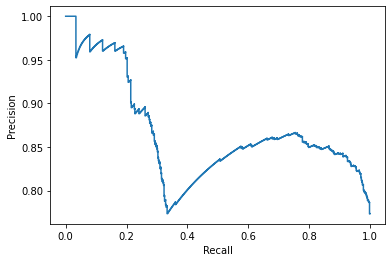

In [ ]:
# Plot precision vs recall
plt.step(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
# Assessing other scoring thresholds
ypred_lower = y_scores > -1
ypred_higher = y_scores > 1

print('Precision for Low Threshold:',precision_score(y, ypred_lower))
print('Precision for High Threshold:',precision_score(y, ypred_higher))
print('Recall for Low Threshold:',recall_score(y, ypred_lower))
print('Recall for High Threshold:',recall_score(y, ypred_higher))

Precision for Low Threshold: 0.7734375
Precision for High Threshold: 0.8426966292134831
Recall for Low Threshold: 1.0
Recall for High Threshold: 0.8838383838383839


Text(0, 0.5, 'True Positive Rate')

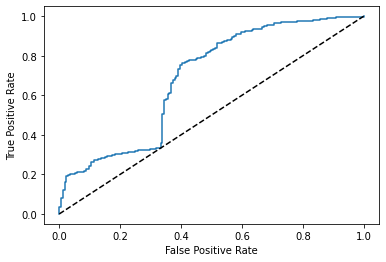

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_scores)

0.6859108324625566

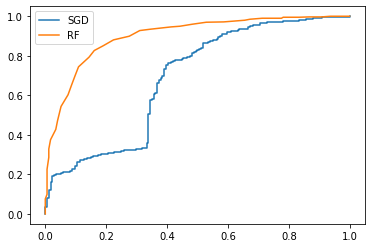

In [ ]:
# Random Forests and predict_proba()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
X500 = np.array(X500)
y_probas_rfc = cross_val_predict(rfc,
                                 X500,
                                 y,
                                 cv=3,
                                 method='predict_proba',
                                 n_jobs=3)

y_scores_rfc = y_probas_rfc[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y,y_scores_rfc) 

# compare precision/recall tradeoff for SGD and RF classifiers
plt.plot(fpr, tpr, label="SGD")
plt.plot(fpr_rfc, tpr_rfc, label="RF")
plt.legend()

In [ ]:
roc_auc_score(y,y_scores_rfc)

0.9004170053020628

## Multinomial Classification

In [ ]:
author = df['authorship']
authpred = cross_val_predict(sgd_clf,
                              X500,
                              author,
                              cv=7)
print((authpred == author).mean())
list(zip(author[:8],authpred[:8]))

0.203125


[('GINSBURG', 'GINSBURG'),
 ('STEVENS', 'STEVENS'),
 ("O'CONNOR", 'KENNEDY'),
 ('KENNEDY', 'SOUTER'),
 ('KENNEDY', 'KENNEDY'),
 ('SOUTER', 'SOUTER'),
 ('BREYER', 'BREYER'),
 ('GINSBURG', 'THOMAS')]

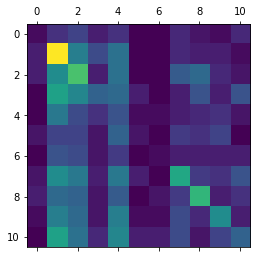

In [ ]:
# Multi-class confusion matrix
conf_mx = confusion_matrix(author,authpred)
conf_mx
plt.matshow(conf_mx)
plt.show()

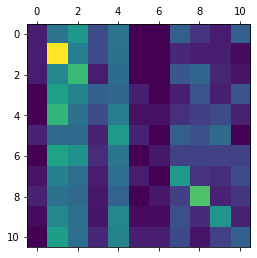

In [ ]:
# normalize colors
conf_mx_norm = conf_mx / conf_mx.sum(axis=1, keepdims=True)
plt.matshow(conf_mx_norm)

## Multinomial Logistic

In [ ]:

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1, # default L2 penalty # .01, .1, 1, 2, 10
                              class_weight='balanced')

scores = cross_val_score(logistic,
                         Xscale[:1000],
                         author[:1000],
                         cv=3,
                         n_jobs=3)

scores.mean(), scores.std()

(0.09765625, 0.01390244564066577)

# Ensemble Learning

In [ ]:
Y = df1['x_republican'] > 0

# Bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=50,
        max_samples=100, bootstrap=True, n_jobs=-1
    )

cross_val_score(bag_clf, X500, Y).mean()

0.7981750275867923

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1)
y_pred_rf = cross_val_predict(rnd_clf, X500, Y)                              
confusion_matrix(Y,y_pred_rf)

array([[  2, 172],
       [  0, 594]])

In [ ]:
rnd_clf.fit(X500,Y)
feature_importances = rnd_clf.feature_importances_
sorted(zip(feature_importances, word), reverse=True)

[(0.0029693369881508783, 'o'),
 (0.0022265739753957138, 'r'),
 (0.0012607091278753317, 'y'),
 (0.00034628666033669533, 'k')]

In [ ]:
# XGBoost
from xgboost import XGBClassifier, XGBRegressor
dfX = pd.DataFrame(X500,columns=vocab)
xgb_clf = XGBClassifier()
cross_val_score(xgb_clf, dfX, Y).mean()

0.8749681690858161

In [ ]:
xgb_reg = XGBRegressor(feature_names=vocab)
xgb_reg.fit(dfX,Y)
sorted(zip(xgb_reg.feature_importances_, vocab),reverse=True)[:10]

[15:31:19] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.



[(0.033571474, 'analysis'),
 (0.031830106, 'new york'),
 (0.029660394, 'granted certiorari'),
 (0.026276007, 'sought'),
 (0.025258558, 'related'),
 (0.023935124, 'stated'),
 (0.023086436, 'internal quotation'),
 (0.021765428, 'require'),
 (0.021112507, 'light'),
 (0.021009019, 'added')]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

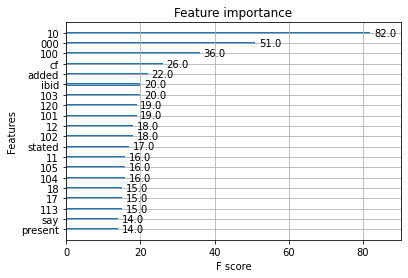

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_reg, max_num_features=20)

## PyTorch MLP 

[PyTorch](https://pytorch.org/) is the dominant DL framework nowadays.

**Classification**

In [ ]:
# setup
%matplotlib notebook
# set this to your working directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vectorizer.fit_transform(df['opinion_text'])
pd.to_pickle(X,'X.pkl')
vocab = vectorizer.get_feature_names_out()
pd.to_pickle(vocab,'vocab.pkl')
Y = df['x_republican']

X.shape

(768, 1000)

In [ ]:
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957


In [ ]:
# Getting started with torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
import math

device = 'cuda' # to use GPU in colab, refer to https://medium.com/dataman-in-ai/start-using-google-colab-free-gpu-7968acb7ef92#:~:text=Go%20to%20Edit%20%3E%20Notebook%20settings,That's%20it. 
# create a torch dataset to contain our data
class ScCasesDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    return self.X[index], self.y[index]


tsize = math.ceil(0.1 * len(Y))
X_train, X_valid, y_train, y_valid = train_test_split(X.toarray(), np.array(Y), test_size=tsize)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=tsize)

train_dataset = ScCasesDataset(X_train, y_train)
valid_dataset = ScCasesDataset(X_valid, y_valid)
test_dataset = ScCasesDataset(X_test, y_test)
# prepare dataloaders where we can load mini-batches from
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# create an MLP model
input_dim = X.shape[1]
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # use nn.Sequential to sequentially stack modules
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 50), # input layer
            nn.ReLU(), # activation function
            nn.Linear(50, 50), # hidden layer
            nn.ReLU(),
            nn.Linear(50, 1), # output layer
        )
        
    # define the forward propagation which is necessary for torch models
    def forward(self, x):
        return self.layers(x)

# initialize a model on GPU
model = MLP().to(device)
summary(model, input_size=(1000,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          50,050
              ReLU-2                   [-1, 50]               0
            Linear-3                   [-1, 50]           2,550
              ReLU-4                   [-1, 50]               0
            Linear-5                    [-1, 1]              51
Total params: 52,651
Trainable params: 52,651
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.20
Estimated Total Size (MB): 0.21
----------------------------------------------------------------


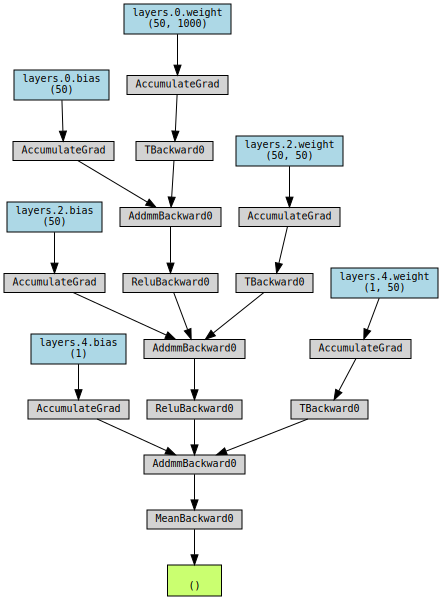

In [ ]:
# Visualize a model

# Requires graphviz!

# !brew install graphviz
# !pip install torchviz
from IPython.display import SVG
from torchviz import make_dot

dataiter = iter(valid_loader)
X_0, _ = next(dataiter) # load the first mini-batch
y_0 = model(X_0.float().to(device))
make_dot(y_0.mean(), params=dict(model.named_parameters()))

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
# fit the model
model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss() # a binary cross entropy loss combined with a sigmoid activation

mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 10
best_score = 0

for epoch in range(epochs):
    # switch the model to train mode
    model.train()
    
    train_losses = []
    valid_losses = []
    for i, (Xs, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        outputs = model(Xs.float().to(device))
        loss = loss_fn(outputs, labels.float().unsqueeze(1).to(device)) # shape (32,) -> (32,1)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
            
    model.eval()
    pred_labels = []
    true_labels = []
    with torch.no_grad():
        for i, (Xs, labels) in enumerate(valid_loader):
            outputs = model(Xs.float().to(device))
            loss = loss_fn(outputs, labels.float().unsqueeze(1).to(device))
            
            valid_losses.append(loss.item())
            
            predicted = [1 if d > 0.5 else 0 for d in outputs.data.squeeze()]
            pred_labels.extend(predicted)
            true_labels.extend(list(labels))
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    accuracy = accuracy_score(true_labels, pred_labels)
    if accuracy > best_score:
      torch.save(model, 'best.pt')
      best_score = accuracy
    valid_acc_list.append(accuracy)
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid acc : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), accuracy))

model = torch.load('best.pt')
model.eval()

pred_labels = []
true_labels = []
for i, (Xs, labels) in enumerate(test_loader):
    outputs = model(Xs.float().to(device))
    
    pred = [1 if d > 0.5 else 0 for d in outputs.data.squeeze()]
    pred_labels.extend(pred)
    true_labels.extend(list(labels))

print('test accuracy:', accuracy_score(true_labels, pred_labels))

epoch : 1, train loss : 0.5308, valid loss : 0.5452, valid acc : 0.73%
epoch : 2, train loss : 0.3403, valid loss : 0.4627, valid acc : 0.82%
epoch : 3, train loss : 0.1623, valid loss : 0.4398, valid acc : 0.82%
epoch : 4, train loss : 0.0555, valid loss : 0.4457, valid acc : 0.78%
epoch : 5, train loss : 0.0201, valid loss : 0.5049, valid acc : 0.78%
epoch : 6, train loss : 0.0110, valid loss : 0.5076, valid acc : 0.84%
epoch : 7, train loss : 0.0050, valid loss : 0.5483, valid acc : 0.81%
epoch : 8, train loss : 0.0030, valid loss : 0.5813, valid acc : 0.79%
epoch : 9, train loss : 0.0023, valid loss : 0.6068, valid acc : 0.79%
epoch : 10, train loss : 0.0015, valid loss : 0.6195, valid acc : 0.81%
test accuracy: 0.8831168831168831


In [ ]:
# these are the learned coefficients
for name, param in model.named_parameters():
  print(name)
  print(param.shape)
  print(param)

layers.0.weight
torch.Size([50, 1000])
Parameter containing:
tensor([[-0.0313,  0.0266, -0.0020,  ..., -0.0467,  0.0287,  0.0031],
        [ 0.0186, -0.0277, -0.0185,  ..., -0.0051,  0.0051, -0.0362],
        [-0.0098,  0.0002, -0.0030,  ...,  0.0145, -0.0185, -0.0028],
        ...,
        [-0.0015,  0.0322,  0.0147,  ...,  0.0175, -0.0184,  0.0251],
        [-0.0108, -0.0203, -0.0275,  ..., -0.0010,  0.0120,  0.0045],
        [-0.0104, -0.0272,  0.0007,  ...,  0.0184,  0.0017,  0.0057]],
       device='cuda:0', requires_grad=True)
layers.0.bias
torch.Size([50])
Parameter containing:
tensor([ 0.0438, -0.0409,  0.0031, -0.0211,  0.0248,  0.0010, -0.0138,  0.0295,
        -0.0268,  0.0084,  0.0152,  0.0035, -0.0029, -0.0036,  0.0207, -0.0053,
         0.0430, -0.0031, -0.0258,  0.0145, -0.0088,  0.0044,  0.0111,  0.0149,
         0.0457,  0.0071,  0.0126,  0.0245, -0.0150, -0.0022,  0.0140,  0.0058,
         0.0377,  0.0013, -0.0083,  0.0151, -0.0214,  0.0043,  0.0281,  0.0094,
        

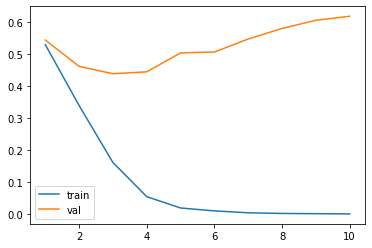

In [ ]:
# Plot performance by epoch
%matplotlib inline
plt.plot(list(range(1, 11)), mean_train_losses)
plt.plot(list(range(1, 11)), mean_valid_losses)
plt.legend(['train', 'val'], loc='best')


**Regression**

In [ ]:
from sklearn.metrics import r2_score

# Regression model with R-squared
Yreg = df['log_cite_count']

# prepare regression dataset
tsize = math.ceil(0.1 * len(Y))
X_train, X_valid, y_train, y_valid = train_test_split(X.toarray(), np.array(Yreg), test_size=tsize)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=tsize)

train_dataset = ScCasesDataset(X_train, y_train)
valid_dataset = ScCasesDataset(X_valid, y_valid)
test_dataset = ScCasesDataset(X_test, y_test)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

model = MLP().to(device) # create a model for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss() # we use Mean Square Error for regression

mean_train_losses = []
mean_valid_losses = []
valid_r2_list = []
epochs = 15
best_score = 0

for epoch in range(epochs):
    # switch the model to train mode
    model.train()
    
    train_losses = []
    valid_losses = []
    for i, (Xs, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        outputs = model(Xs.float().to(device))
        loss = loss_fn(outputs, labels.float().unsqueeze(1).to(device)) # shape (32,) -> (32,1)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
            
    model.eval()
    pred_labels = []
    true_labels = []
    with torch.no_grad():
        for i, (Xs, labels) in enumerate(valid_loader):
            outputs = model(Xs.float().to(device))
            loss = loss_fn(outputs, labels.float().unsqueeze(1).to(device))
            
            valid_losses.append(loss.item())
            
            predicted = outputs.data.squeeze()
            pred_labels.extend(list(predicted.cpu()))
            true_labels.extend(list(labels.cpu()))
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    r2 = r2_score(true_labels, pred_labels)
    if r2 > best_score:
      torch.save(model, 'best.pt')
      best_score = r2
    valid_r2_list.append(r2)
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid r2 : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), r2))
    
model = torch.load('best.pt')
model.eval()

pred_labels = []
true_labels = []
for i, (Xs, labels) in enumerate(test_loader):
    outputs = model(Xs.float().to(device))
    
    pred = outputs.data.squeeze()
    pred_labels.extend(list(pred.cpu()))
    true_labels.extend(list(labels.cpu()))

print('test r2:', r2_score(true_labels, pred_labels))

epoch : 1, train loss : 21.9946, valid loss : 11.0985, valid r2 : -4.44%
epoch : 2, train loss : 9.2290, valid loss : 6.0304, valid r2 : -2.03%
epoch : 3, train loss : 6.2686, valid loss : 6.3276, valid r2 : -2.07%
epoch : 4, train loss : 5.0958, valid loss : 6.2827, valid r2 : -2.10%
epoch : 5, train loss : 3.9949, valid loss : 5.9435, valid r2 : -2.01%
epoch : 6, train loss : 3.3215, valid loss : 5.8471, valid r2 : -1.96%
epoch : 7, train loss : 2.9058, valid loss : 5.9171, valid r2 : -2.08%
epoch : 8, train loss : 2.4726, valid loss : 5.9532, valid r2 : -2.10%
epoch : 9, train loss : 2.0799, valid loss : 6.0677, valid r2 : -2.23%
epoch : 10, train loss : 1.5552, valid loss : 6.0949, valid r2 : -2.26%
epoch : 11, train loss : 1.2635, valid loss : 6.5474, valid r2 : -2.60%
epoch : 12, train loss : 1.0287, valid loss : 6.8476, valid r2 : -2.79%
epoch : 13, train loss : 0.8495, valid loss : 6.4119, valid r2 : -2.50%
epoch : 14, train loss : 0.6306, valid loss : 6.3615, valid r2 : -2.44%

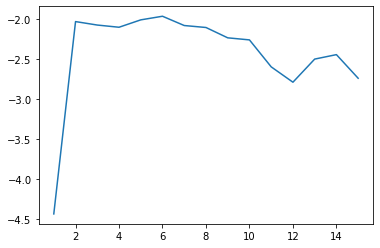

In [ ]:
%matplotlib inline

# Plot performance by epoch
plt.plot(list(range(1, 16)), valid_r2_list)
